In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('whitegrid')

In [3]:
# Read the StudentInfo file
studinfo = pd.read_csv('./data/studentInfo.csv')

In [4]:
studinfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


# Null value check

In [5]:
studinfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

# check the final result 

<AxesSubplot:xlabel='final_result'>

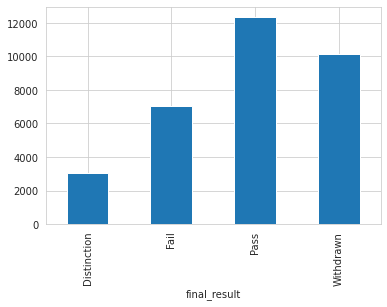

In [6]:
studinfo.groupby('final_result')['id_student'].count().plot(kind='bar')

# Results based on Gender

In [7]:
gender = studinfo.groupby(['gender'],as_index = False)
gender_count = gender['id_student'].count()
gender_count

,gender,id_student
0,F,14718
1,M,17875


In [8]:
result_gender = studinfo.groupby(['gender', 'final_result'],as_index = False)
result_gender_count = result_gender['id_student'].count()
result_gender_count

,gender,final_result,id_student
0,F,Distinction,1394
1,F,Fail,3103
2,F,Pass,5735
3,F,Withdrawn,4486
4,M,Distinction,1630
5,M,Fail,3949
6,M,Pass,6626
7,M,Withdrawn,5670


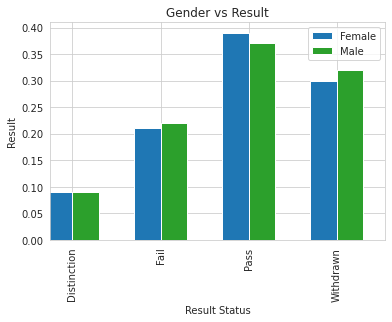

In [9]:
merge = pd.merge(gender_count, result_gender_count, on = 'gender', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['gender','final_result', 'i']]

female = merge.loc[merge['gender'] == 'F']
male = merge.loc[merge['gender'] == 'M']

fig = plt.figure() 

ax = fig.add_subplot(111) 

female.set_index('final_result',drop=True,inplace=True)
male.set_index('final_result',drop=True,inplace=True)
female.plot(kind='bar', ax=ax, width= 0.3, position=1)
male.plot(kind='bar', color='#2ca02c', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Gender vs Result')
plt.legend(['Female', 'Male'])
plt.show()

# Based on Region

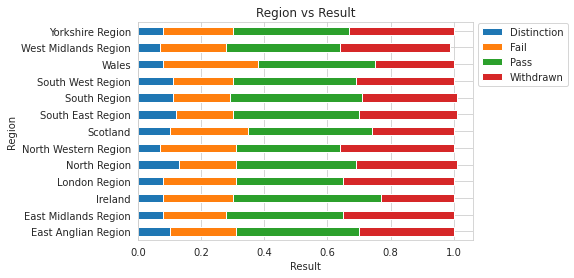

In [10]:
region = studinfo.groupby(['region'],as_index = False)
region_count = region['id_student'].count()
result_region = studinfo.groupby(['region', 'final_result'],as_index = False)
result_region_count = result_region['id_student'].count()

merge = pd.merge(region_count, result_region_count , on = 'region', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['region','final_result', '_']]

merge.set_index(['region','final_result']).unstack().plot(kind="barh", stacked=True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Region')
plt.xlabel('Result')
plt.title('Region vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

# Based on educatio level

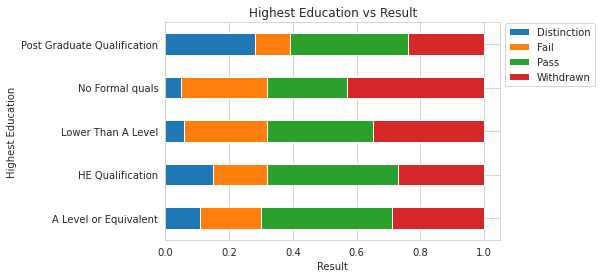

In [11]:
education = studinfo.groupby(['highest_education'],as_index = False)
education_count = education['id_student'].count()
result_education = studinfo.groupby(['highest_education', 'final_result'],as_index = False)
result_education_count = result_education['id_student'].count()

merge = pd.merge(education_count, result_education_count , on = 'highest_education', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['highest_education','final_result', '_']]

merge.set_index(['highest_education','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Highest Education')
plt.xlabel('Result')
plt.title('Highest Education vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

# Based on IMD Band

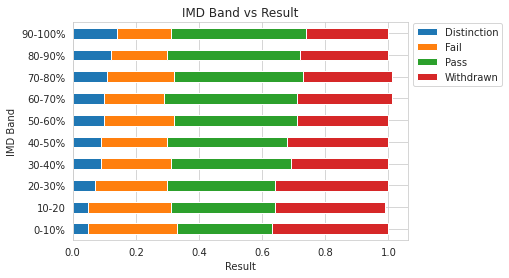

In [12]:
imd = studinfo.groupby(['imd_band'],as_index = False)
imd_count = imd['id_student'].count()
result_imd = studinfo.groupby(['imd_band', 'final_result'],as_index = False)
result_imd_count = result_imd['id_student'].count()

merge = pd.merge(imd_count, result_imd_count , on = 'imd_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['imd_band','final_result', '_']]

merge.set_index(['imd_band','final_result']).unstack().plot(kind="barh", stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('IMD Band')
plt.xlabel('Result')
plt.title('IMD Band vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

# Based on age band

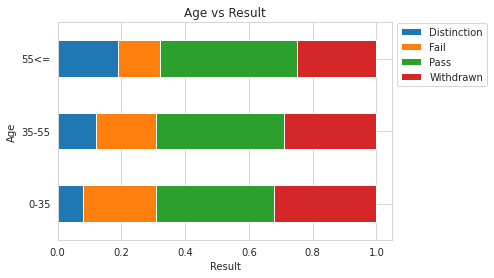

In [13]:
age = studinfo.groupby(['age_band'],as_index = False)
age_count = age['id_student'].count()
result_age = studinfo.groupby(['age_band', 'final_result'],as_index = False)
result_age_count = result_age['id_student'].count()

merge = pd.merge(age_count, result_age_count, on = 'age_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['age_band','final_result', '_']]

merge.set_index(['age_band','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Age')
plt.xlabel('Result')
plt.title('Age vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

# Results based on Diasability

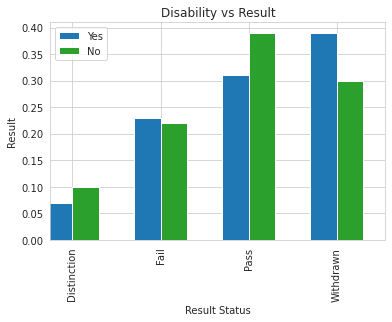

In [14]:
disability_ = studinfo.groupby(['disability'],as_index = False)
disability_count = disability_['id_student'].count()
result_disability = studinfo.groupby(['disability', 'final_result'],as_index = False)
result_disability_count = result_disability['id_student'].count()

merge = pd.merge(disability_count, result_disability_count, on = 'disability', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['disability','final_result', 'i']]

yes = merge.loc[merge['disability'] == 'Y']
no = merge.loc[merge['disability'] == 'N']

fig = plt.figure() 

ax = fig.add_subplot(111) 

yes.set_index('final_result',drop=True,inplace=True)
no.set_index('final_result',drop=True,inplace=True)
yes.plot(kind='bar', ax=ax, width= 0.3, position=1)
no.plot(kind='bar', color='#2ca02c', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Disability vs Result')
plt.legend(['Yes', 'No'])
plt.show()

# Student vs number of course register

In [15]:
scount = studinfo.groupby('id_student').count()['final_result']

In [16]:
scount[scount>1].sort_values(ascending=False)

id_student
584077     5
609605     4
2681198    4
542562     4
610287     4
          ..
615241     2
615229     2
615225     2
615075     2
8462       2
Name: final_result, Length: 3538, dtype: int64

# Student Assessment

In [18]:
studAssessment = pd.read_csv('./data/studentAssessment.csv')
studAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [19]:
studAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [25]:
studAssessment['is_banked'].value_counts()

0    172003
1      1909
Name: is_banked, dtype: int64

In [20]:
studAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


<AxesSubplot:>

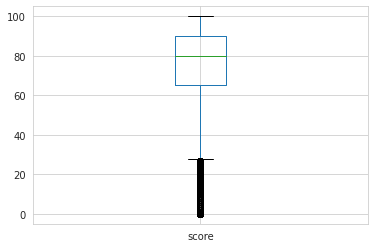

In [21]:
studAssessment['score'].plot(kind='box')

# Assessment info

In [22]:
assessment = pd.read_csv('./data/assessments.csv')
assessment

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [104]:
assessment.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [23]:
assessment['assessment_type'].value_counts()

TMA     106
CMA      76
Exam     24
Name: assessment_type, dtype: int64

In [24]:
assessment.query('code_module=="AAA" and code_presentation=="2013J"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0


# Student register

In [78]:
studRegister = pd.read_csv('./data/studentRegistration.csv')
studRegister

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [105]:
studRegister.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

# Courses

In [79]:
courses = pd.read_csv('./data/courses.csv')
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [106]:
courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

# Student VLE

In [80]:
studvle = pd.read_csv('./data/studentVle.csv')
studvle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [82]:
studvle.query('code_module=="AAA" and code_presentation=="2013J" and id_student=="28400"')

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
165286,AAA,2013J,28400,546649,224,1
165287,AAA,2013J,28400,546654,224,2
165288,AAA,2013J,28400,546614,224,3
165740,AAA,2013J,28400,546614,225,1


In [107]:
studvle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

# VLE

In [26]:
vle = pd.read_csv('./data/vle.csv')
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [84]:
vle['activity_type'].value_counts()

resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
glossary            21
ouelluminate        21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: activity_type, dtype: int64

In [109]:
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [113]:
vle.query('week_from != "nan"')

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


In [28]:
vle.query('code_module=="AAA" and code_presentation=="2013J"')

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
206,547002,AAA,2013J,resource,NaN,NaN
207,547038,AAA,2013J,resource,NaN,NaN
208,546647,AAA,2013J,forumng,NaN,NaN
209,546900,AAA,2013J,url,NaN,NaN


In [29]:
vle.query('code_module=="AAA" and code_presentation=="2013J"')['activity_type'].value_counts()

resource         95
oucontent        68
url              18
forumng          15
subpage           6
dataplus          4
glossary          2
oucollaborate     2
homepage          1
Name: activity_type, dtype: int64